<a href="https://colab.research.google.com/github/beekiran00/DeepMirror-Task-ML-Engineer---Bhanu-Velpula/blob/main/Decision_Tree_Classifier_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Importing Libraries

In [107]:
# DOWNLOAD ADDITIONAL LIBRARIES
!pip install rdkit
!pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html
!pip install PyTDC
!pip install deepchem
!pip install dgl
!pip install dgllife

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
# IMPORT ALL THE NECESSARY LIBRARIES

# basic pandas and numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

# RDkit
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# DEEPCHEM
import deepchem as dc

# SKLEARN metrics and ML classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


# Datasets

In [109]:
from tdc.single_pred import ADME
data = ADME(name = 'HIA_Hou')
split = data.get_split()

Found local copy...
Loading...
Done!


Viewing the dataset, the dataset is in the form of a dictionary, train: values, valid: values and test: values

In [110]:
#split

In [111]:
print("Dataset type: ", type(data))
print(split.keys())
#print(split.values())


Dataset type:  <class 'tdc.single_pred.adme.ADME'>
dict_keys(['train', 'valid', 'test'])


In [112]:
train_df = pd.DataFrame.from_dict(split['train'])
train_df
valid_df = pd.DataFrame.from_dict(split['valid'])
#valid_df
test_df = pd.DataFrame.from_dict(split['test'])
#test_df

# ^ converting the dict to a dataframe of train valid and test

# Decision Tree class

In [113]:

def DTC(train_df, valid_df, test_df):

  """
  A function that takes datasets as input and outputs the model metrics for the decisions tree classifier

  input - pandas dataframe, train, test and valid splits
  output - deccision tree classifier prediction and metrics of the model
  """

  start_time = time.time()


  #Extract features of the Drug column which contains the SMILES Strings
  #create featuriser to extract features of the SMILES, 
  #Circular fingerprint is the most commonly used featurizer to extract features from SMILES data and the default radius is 4

  featurizer = dc.feat.CircularFingerprint() # initialise the featuriser 

  # get the smiles strings from the datasets
  smiles_train = train_df['Drug']
  smiles_valid = valid_df['Drug']
  smiles_test = test_df['Drug']

  # Extract features from each dataset

 
  feat_train = featurizer.featurize(smiles_train)
  feat_valid = featurizer.featurize(smiles_valid)
  feat_test = featurizer.featurize(smiles_test)

  #since we already have test valid and train splits we do not have to split our dataset
  # we convert the featurised arrays to dataframes

  X_train = pd.DataFrame(feat_train)
  X_test = pd.DataFrame(feat_test)
  X_valid = pd.DataFrame(feat_valid)

  y_train = train_df["Y"]
  y_test = test_df["Y"]
  y_valid = valid_df['Y']

  # init the decision tree classifier

  clf = DecisionTreeClassifier() # init the model
  model_clf = clf.fit(X_train,y_train) # fit the model on the X_train and y_train / the training dataset

  y_pred = model_clf.predict(X_test) # predit the Text dataset / X_test

  # get the metrics of the model

  # print accuracy of prediction
  print("Accuracy:", accuracy_score(y_test, y_pred))

  y_score1 = model_clf.predict_proba(X_test)[:,1]
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

  # plot the ROC curve of the model

  plt.subplots(1, figsize=(10,10))
  plt.title('Receiver Operating Characteristic - DecisionTree')
  plt.plot(false_positive_rate1, true_positive_rate1)
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print("---%s seconds---" % (time.time()-start_time))
  # plot the confusion matrix of the model
  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


    

Accuracy: 0.9051724137931034
roc_auc_score for DecisionTree:  0.7740097666847532


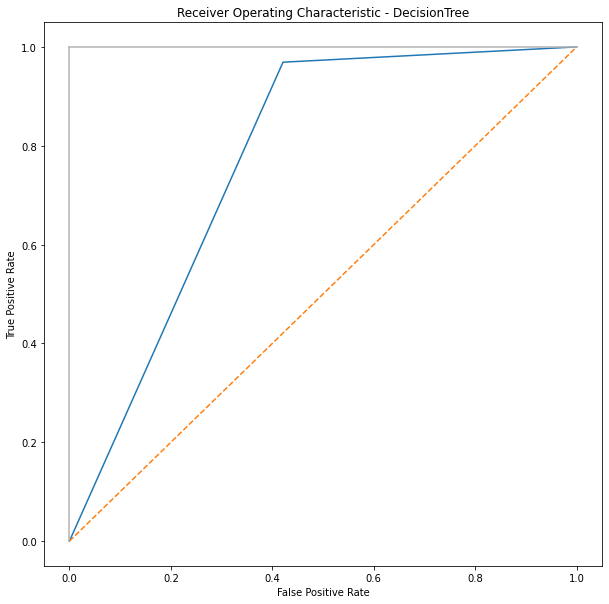

---2.2805445194244385 seconds---


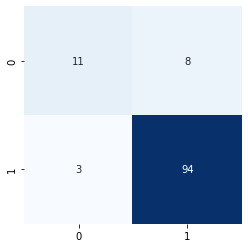

In [114]:
DTC(train_df, valid_df, test_df) # call the function with the pandas dataset splits